<a href="https://colab.research.google.com/github/jabsolo73/real-estate-price-predict/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
(331, 5) (83, 5)
(331,) (83,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


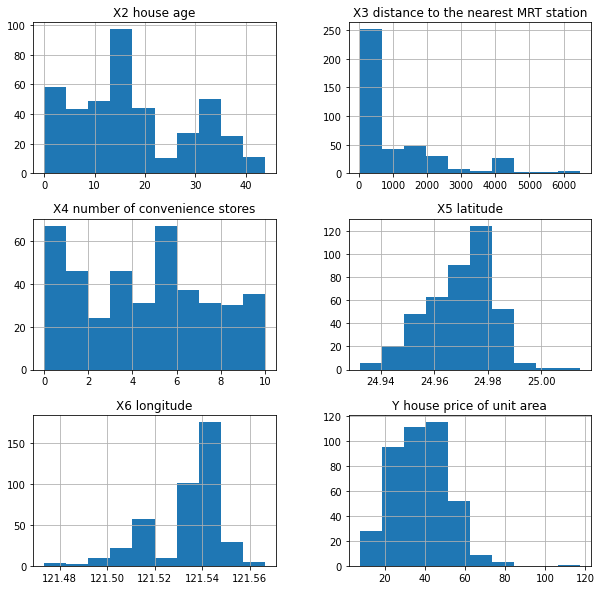

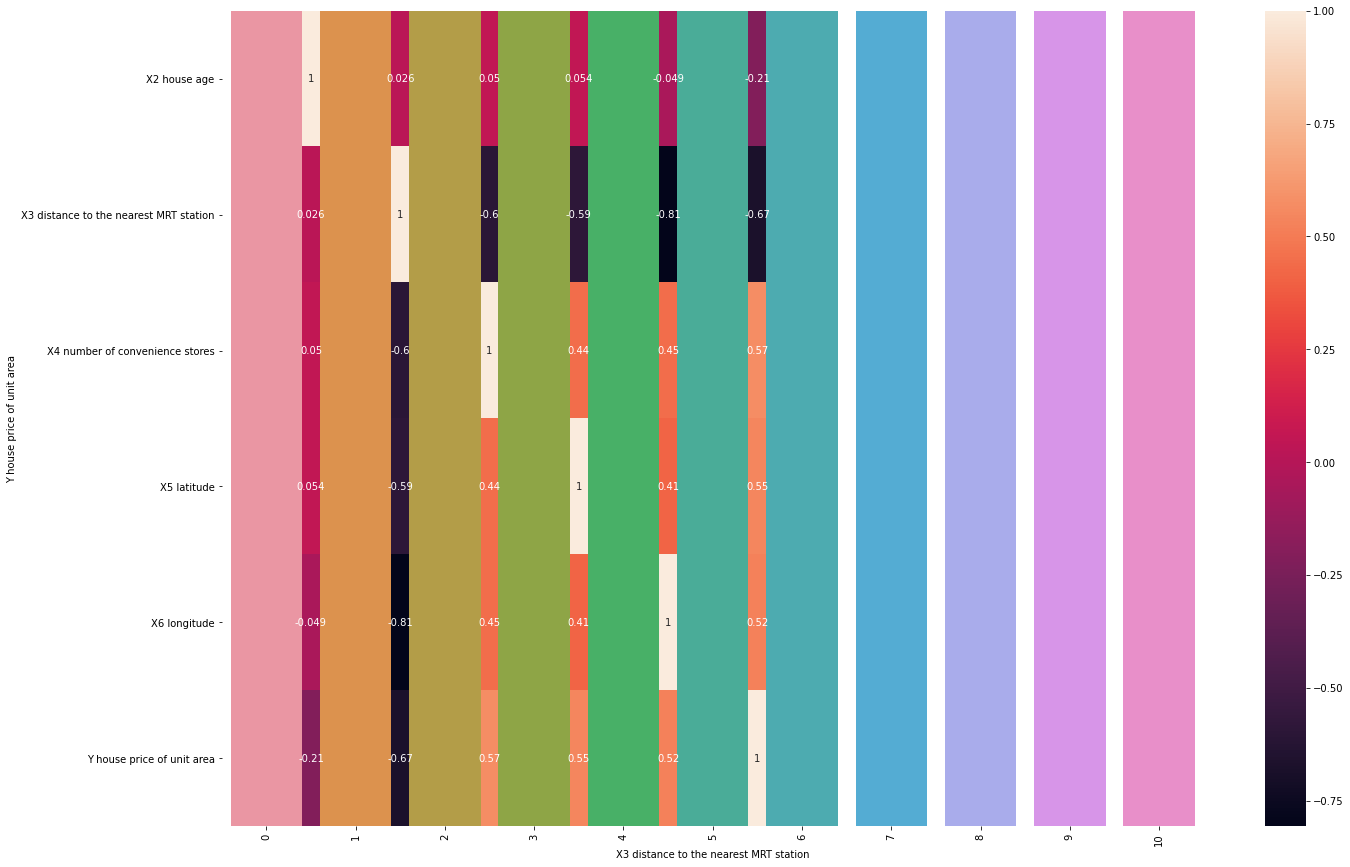

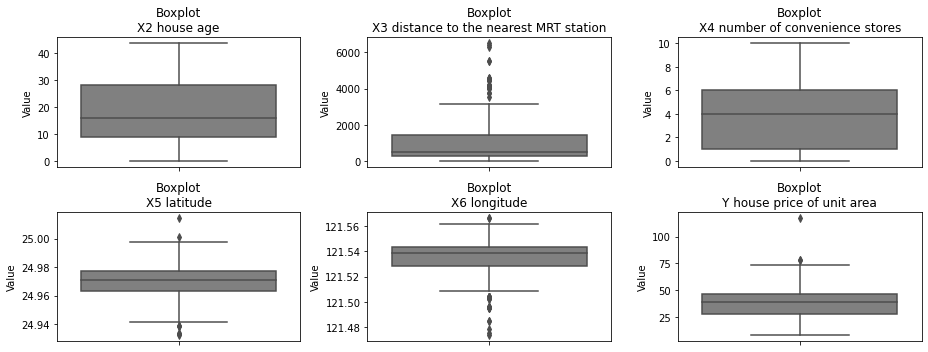

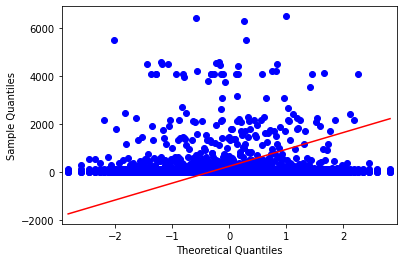

[ 0.38153742  1.88190636  0.15404583 -0.43700772 -1.21516823]
(331, 5)
(83, 5)
                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.940
Model:                                    OLS   Adj. R-squared (uncentered):              0.939
Method:                         Least Squares   F-statistic:                              1023.
Date:                        Fri, 23 Jul 2021   Prob (F-statistic):                   7.79e-197
Time:                                03:54:25   Log-Likelihood:                         -1233.8
No. Observations:                         331   AIC:                                      2478.
Df Residuals:                             326   BIC:                                      2497.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust            

,Estimated Price,Y house price of unit area
0,25.500000,27.3
1,47.566667,54.4
2,23.733333,22.0
3,15.266667,11.6
4,46.200000,45.4
...,...,...
78,31.700000,33.1
79,48.400000,59.6
80,44.933333,40.8
81,46.200000,52.2


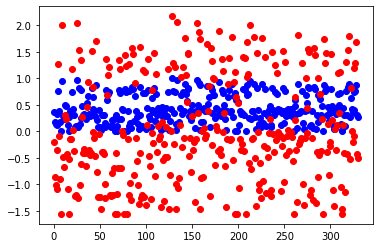

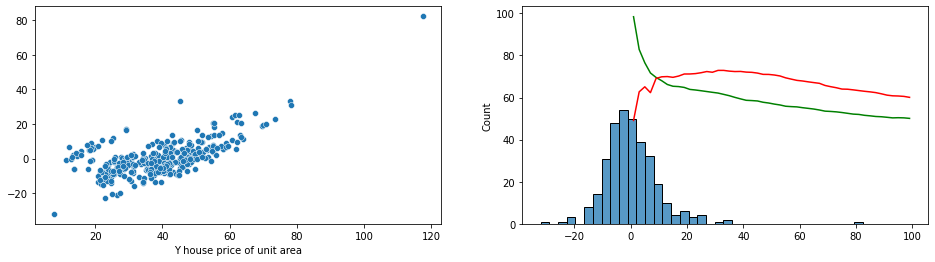

In [13]:


# Real Estate Price Prediction Dataset Analysis



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



d2 = pd.read_csv('/content/Real estate.csv')
d2.head(10)


d2.shape

#%%

d2.info()

#%%

tbd = ['X1 transaction date','No']
d2 = d2.drop(tbd, axis=1)
d2.head(3)

#%%

d2.describe()

#%%

d2.hist(figsize=(10,10))

#%%

corr = d2.corr()
corr

#%%

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr, annot=True, ax=ax)

#%% md

### Correlation Analysis
 #'X3 distance to the nearest MRT station' column shows least correlation.

#%%

# Checking for null vlaues
d2.isnull().sum()

#%%

# Numerical attributes comparison using scatterplot
sns.barplot(x=d2['X4 number of convenience stores'], y=d2['Y house price of unit area']);

#%% md

#As the number of convenience stores increase in the locality, House price goes up.<br>
#This shows <b>positive</b> relation between these attributes.

#%%

sns.regplot(x=d2['X2 house age'], y=d2['Y house price of unit area']);

#%% md

#The trend line shows house price reducing with increase in house age.<br>
#These attributes show a <b>negative</b> relation

#%%

sns.regplot(x=d2['X3 distance to the nearest MRT station'], y=d2['Y house price of unit area']);

#%% md

#This states that the houses that are near to MRT station have <b>higher</b> price

#%%

sns.lineplot(x=d2['X2 house age'], y=d2['X3 distance to the nearest MRT station']);

#%% md

#This shows that houses with an average age of <b>15 - 20 years</b> have <b>high distances</b> to MRT station while the houses aged for <b>35+</b> years are <b>more closer</b> to the stations

#%% md

### Conclusion from EDA and Graph plots:
#1. Data is clean having no null values<br>
#2. Data doesn't have High correlation amongst attributes<br>
#3. Houses with more convenience stores in the area, with low age have high prices<br>
#4. Houses that are aged have more MRT stations near them and fall in low price.

#%% md

## Outlier Detection

#%%

plt.figure(figsize=(13,5))

for feat, grd in zip(d2, range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=d2[feat], color='grey')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

#%% md

#Data has outliers present outside the quartile range.

#%% md

## Splitting the data

#%%

X2 = d2.loc[:,'X2 house age' : 'X6 longitude']
y2 = d2.loc[:,'Y house price of unit area']

#%%

#Train-test split
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

#%% md

## Statistical Analysis

#%%

from statsmodels.graphics.gofplots import qqplot

qqplot(X2,line='s')
plt.show()

#%%

from scipy.stats import skew

print(skew(X2))

#%% md

#Data does not appear to be following Gaussian / Normal Distribution. Both positively and Negatively skewed data is observed.

#%%

# Scaling Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm_2 = mms.fit_transform(X_train_2)
X_test_norm_2 = mms.transform(X_test_2)

# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_std_2 = scaler.transform(X_train_2)
X_test_std_2 = scaler.transform(X_test_2)

# Comparing Scaled Data

xx = np.arange(len(X_train_std_2))
yy1 = X_train_norm_2[:,0]
yy2 = X_train_std_2[:,0]
plt.scatter(xx,yy1,color='b')
plt.scatter(xx,yy2,color='r')

print(X_train_std_2.shape)
print(X_test_std_2.shape)

#%% md

#Min-Max Scaler gives more uniform scaling than Standard Scaler

#%% md

## OLS regression analysis

#%%

import statsmodels.api as sm
model_ols = sm.OLS(y_train_2, X_train_norm_2)
fitted = model_ols.fit()
print(fitted.summary())

#%%

from scipy.stats import shapiro
fig, ax = plt.subplots(figsize=(16,4), ncols=2)
ax[0] = sns.scatterplot(x=y_train_2, y=fitted.resid, ax=ax[0])
ax[1] = sns.histplot(fitted.resid, ax=ax[1])

statistic, p_value = shapiro(fitted.resid)
if p_value>0.05:
    print("Distribution is normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))
else:
    print("Distribution is not normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))

#%% md

## KNN Regressor model construction

#%%

from sklearn.neighbors import KNeighborsRegressor as knn
model4 = knn(n_neighbors=3,p=1,algorithm='brute')
model4.fit(X_train_norm_2,y_train_2)

#%%

ypred3 = model4.predict(X_test_norm_2)
ypred3

#%%

model4.score(X_test_norm_2,y_test_2)

#%%

k_values = np.arange(1,100,2)

#%%

train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model2 = knn(n_neighbors=k,p=1)
    model2.fit(X_train_norm_2,y_train_2)
    
    train_score = model2.score(X_train_norm_2, y_train_2) 
    train_score_arr.append(train_score*100)
    
    val_score = model2.score(X_test_norm_2, y_test_2)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

#%%

plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

#%% md

#From the above values we can conclude that the best value for k will be between 9 to 13

#%%

from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(model4, X_train_norm_2, y_train_2, cv=10, scoring='r2')
print(cross_val_score_train)

#%%

cross_val_score_train.mean()

#%%

from sklearn.metrics import r2_score

print(r2_score(y_test_2, ypred3))

#%%

c = pd.DataFrame(ypred3, columns=['Estimated Price'])
c.head()

#%%

d = pd.DataFrame(y_test_2)
d = y_test_2.reset_index(drop=True)
d.head()

#%%

ynew = pd.concat([c,d], axis=1)
ynew
